In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/dundigal 2020-11-29 to 2022-11-28.csv")
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,dundigal,2020-11-29,26.5,20.0,22.5,26.5,20.0,22.5,19.9,85.8,...,10.7,5,NaN,2020-11-29T06:29:46,2020-11-29T17:39:44,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."
1,dundigal,2020-11-30,27.6,18.3,23.0,28.4,18.3,23.1,18.7,78.3,...,13.5,7,NaN,2020-11-30T06:30:22,2020-11-30T17:39:52,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."
2,dundigal,2020-12-01,27.6,18.0,22.3,27.8,18.0,22.3,17.4,76.1,...,15.8,7,NaN,2020-12-01T06:30:58,2020-12-01T17:40:01,0.51,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."
3,dundigal,2020-12-02,28.6,15.5,22.0,28.0,15.5,22.0,15.1,67.9,...,16.2,7,NaN,2020-12-02T06:31:34,2020-12-02T17:40:11,0.53,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."
4,dundigal,2020-12-03,27.4,14.6,21.7,28.2,14.6,21.8,17.2,77.3,...,13.2,6,NaN,2020-12-03T06:32:10,2020-12-03T17:40:23,0.55,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,F3069,43083099999,43128599999,VOHS,431280..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,dundigal,2022-11-24,27.2,20.5,23.8,28.5,20.5,24.1,18.5,73.1,...,18.5,8,10.0,2022-11-24T06:26:32,2022-11-24T17:39:24,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
726,dundigal,2022-11-25,29.8,19.7,24.3,30.2,19.7,24.4,16.4,63.8,...,19.5,8,10.0,2022-11-25T06:27:07,2022-11-25T17:39:25,0.02,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
727,dundigal,2022-11-26,29.9,17.2,23.2,28.8,17.2,22.9,13.0,55.6,...,19.8,8,10.0,2022-11-26T06:27:42,2022-11-26T17:39:28,0.04,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
728,dundigal,2022-11-27,29.0,15.1,22.6,28.3,15.1,22.5,12.7,55.9,...,19.9,8,10.0,2022-11-27T06:28:18,2022-11-27T17:39:31,0.08,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43128599999,VOHS,43128099999"


In [ ]:
df.shape

(730, 33)

In [ ]:
df.apply(pd.isnull).sum()/df.shape[0] #Missing values

name                0.000000
datetime            0.000000
tempmax             0.000000
tempmin             0.000000
temp                0.000000
feelslikemax        0.000000
feelslikemin        0.000000
feelslike           0.000000
dew                 0.000000
humidity            0.000000
precip              0.000000
precipprob          0.000000
precipcover         0.000000
preciptype          0.560274
snow                0.000000
snowdepth           0.000000
windgust            0.517808
windspeed           0.000000
winddir             0.000000
sealevelpressure    0.001370
cloudcover          0.000000
visibility          0.000000
solarradiation      0.000000
solarenergy         0.000000
uvindex             0.000000
severerisk          0.557534
sunrise             0.000000
sunset              0.000000
moonphase           0.000000
conditions          0.000000
description         0.000000
icon                0.000000
stations            0.000000
dtype: float64

In [ ]:
core_weather= df[["datetime","tempmax","tempmin","humidity","dew","precip","sealevelpressure"]].copy()

In [ ]:
core_weather.columns=["datetime","tempmax","tempmin","humidity","dew","precip","sealevelpressure"]
core_weather

,datetime,tempmax,tempmin,humidity,dew,precip,sealevelpressure
0,2020-11-29,26.5,20.0,85.8,19.9,0.0,1014.9
1,2020-11-30,27.6,18.3,78.3,18.7,0.0,1014.5
2,2020-12-01,27.6,18.0,76.1,17.4,0.0,1014.5
3,2020-12-02,28.6,15.5,67.9,15.1,0.0,1013.3
4,2020-12-03,27.4,14.6,77.3,17.2,0.0,1012.9
...,...,...,...,...,...,...,...
725,2022-11-24,27.2,20.5,73.1,18.5,0.0,1014.5
726,2022-11-25,29.8,19.7,63.8,16.4,0.0,1015.2
727,2022-11-26,29.9,17.2,55.6,13.0,0.0,1014.2
728,2022-11-27,29.0,15.1,55.9,12.7,0.0,1012.8


In [ ]:
core_weather.apply(pd.isnull).sum()/df.shape[0]

datetime            0.00000
tempmax             0.00000
tempmin             0.00000
humidity            0.00000
dew                 0.00000
precip              0.00000
sealevelpressure    0.00137
dtype: float64

In [ ]:
core_weather["sealevelpressure"].value_counts() #Only Column with Null values 0.13%(Null)

1013.3    13
1009.0    13
1014.2    11
1012.7    11
1014.7    11
          ..
1017.6     1
1018.5     1
1017.9     1
1017.2     1
1004.3     1
Name: sealevelpressure, Length: 159, dtype: int64

In [ ]:
core_weather[pd.isnull(core_weather["sealevelpressure"])]

,datetime,tempmax,tempmin,humidity,dew,precip,sealevelpressure
75,2021-02-12,29.0,15.0,59.7,12.9,0.0,NaN


In [ ]:
core_weather.loc[70:80,:]

,datetime,tempmax,tempmin,humidity,dew,precip,sealevelpressure
70,2021-02-07,28.3,15.5,56.7,12.4,0.0,1014.2
71,2021-02-08,27.9,15.5,54.6,10.9,0.0,1015.2
72,2021-02-09,30.0,15.2,53.2,11.1,0.0,1014.2
73,2021-02-10,31.5,13.6,57.6,12.1,0.0,1012.6
74,2021-02-11,28.3,14.6,60.9,13.5,0.0,1011.8
75,2021-02-12,29.0,15.0,59.7,12.9,0.0,NaN
76,2021-02-13,29.2,15.0,60.6,13.6,0.0,1013.3
77,2021-02-14,30.3,15.5,55.8,12.8,0.0,1012.8
78,2021-02-15,31.2,18.0,49.0,12.3,0.0,1011.4
79,2021-02-16,31.5,19.0,50.4,13.1,0.0,1010.7


In [ ]:
core_weather["sealevelpressure"]=core_weather["sealevelpressure"].fillna(0)

In [ ]:
core_weather.apply(pd.isnull).sum()/df.shape[0] #No missing values now

datetime            0.0
tempmax             0.0
tempmin             0.0
humidity            0.0
dew                 0.0
precip              0.0
sealevelpressure    0.0
dtype: float64

In [ ]:
core_weather.apply(lambda x: (x==9999).sum())

datetime            0
tempmax             0
tempmin             0
humidity            0
dew                 0
precip              0
sealevelpressure    0
dtype: int64

<Axes: >

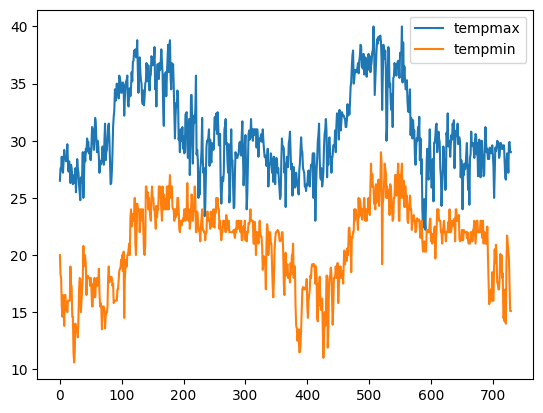

In [ ]:
core_weather[["tempmax","tempmin"]].plot()

<Axes: >

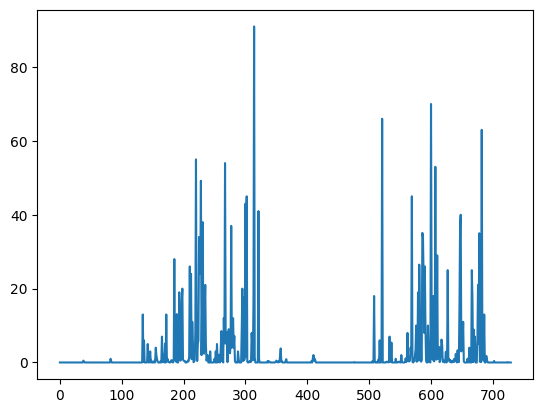

In [ ]:
core_weather["precip"].plot()

In [ ]:
core_weather.groupby(core_weather.index).sum()["precip"]

<ipython-input-18-94b6a3b60482>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  core_weather.groupby(core_weather.index).sum()["precip"]


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Name: precip, Length: 730, dtype: float64

In [ ]:
x=core_weather.loc[220:300,:]
x.groupby(x.index).sum()["precip"] #To see rainfall on particular days

<ipython-input-19-ff39054ca662>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x.groupby(x.index).sum()["precip"] #To see rainfall on particular days


220    55.0
221     7.0
222     0.4
223     5.0
224     6.0
       ... 
296     0.4
297    17.6
298     0.6
299     1.7
300    43.0
Name: precip, Length: 81, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

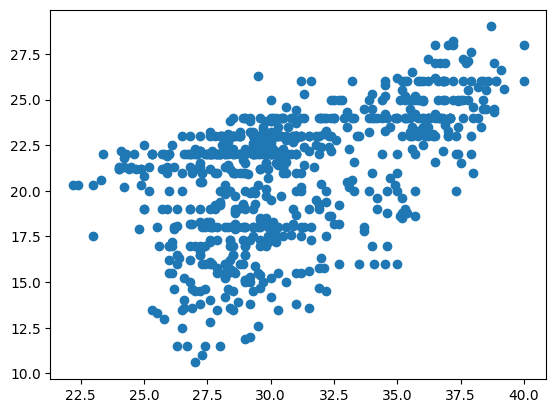

In [ ]:
maxT=df.tempmax
minT=df.tempmin
plt.scatter(maxT,minT)

<ipython-input-22-a64f625093f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temp'])


<Axes: xlabel='temp', ylabel='Density'>

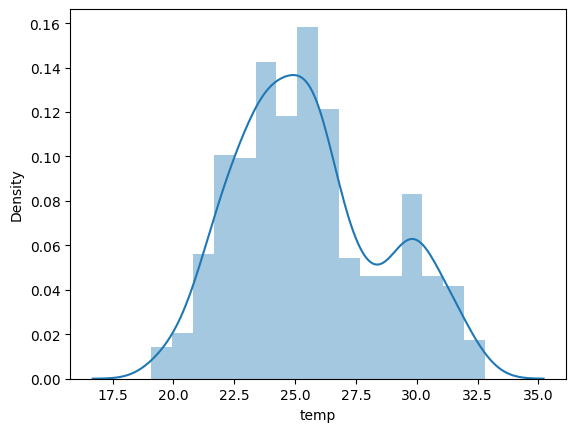

In [ ]:
sns.distplot(df['temp'])

In [ ]:
core_weather["target"]=core_weather.shift(-1)["tempmax"]
core_weather

,datetime,tempmax,tempmin,humidity,dew,precip,sealevelpressure,target
0,2020-11-29,26.5,20.0,85.8,19.9,0.0,1014.9,27.6
1,2020-11-30,27.6,18.3,78.3,18.7,0.0,1014.5,27.6
2,2020-12-01,27.6,18.0,76.1,17.4,0.0,1014.5,28.6
3,2020-12-02,28.6,15.5,67.9,15.1,0.0,1013.3,27.4
4,2020-12-03,27.4,14.6,77.3,17.2,0.0,1012.9,27.2
...,...,...,...,...,...,...,...,...
725,2022-11-24,27.2,20.5,73.1,18.5,0.0,1014.5,29.8
726,2022-11-25,29.8,19.7,63.8,16.4,0.0,1015.2,29.9
727,2022-11-26,29.9,17.2,55.6,13.0,0.0,1014.2,29.0
728,2022-11-27,29.0,15.1,55.9,12.7,0.0,1012.8,29.0


In [ ]:
core_weather=core_weather.iloc[:-1,:].copy()

In [ ]:
core_weather

,datetime,tempmax,tempmin,humidity,dew,precip,sealevelpressure,target
0,2020-11-29,26.5,20.0,85.8,19.9,0.0,1014.9,27.6
1,2020-11-30,27.6,18.3,78.3,18.7,0.0,1014.5,27.6
2,2020-12-01,27.6,18.0,76.1,17.4,0.0,1014.5,28.6
3,2020-12-02,28.6,15.5,67.9,15.1,0.0,1013.3,27.4
4,2020-12-03,27.4,14.6,77.3,17.2,0.0,1012.9,27.2
...,...,...,...,...,...,...,...,...
724,2022-11-23,28.8,21.0,67.8,17.8,0.1,1014.2,27.2
725,2022-11-24,27.2,20.5,73.1,18.5,0.0,1014.5,29.8
726,2022-11-25,29.8,19.7,63.8,16.4,0.0,1015.2,29.9
727,2022-11-26,29.9,17.2,55.6,13.0,0.0,1014.2,29.0


In [ ]:
from sklearn.linear_model import Ridge #Ridge regression reduces Over Fitting data
reg=Ridge(alpha=.1)

In [ ]:
predictors=["precip","tempmax","tempmin","humidity","sealevelpressure"]

In [ ]:
train=core_weather.loc[:629]

In [ ]:
test=core_weather.loc[630:]

In [ ]:
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [ ]:
predictions=reg.predict(test[predictors])

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(test["target"], predictions)

1.0708802678923866

In [ ]:
combined=pd.concat([test["target"],pd.Series(predictions,index=test.index)], axis=1)
combined.columns=["actual","predictions"]
combined

,actual,predictions
630,28.6,30.448464
631,29.7,28.969118
632,30.5,29.702425
633,30.1,30.381590
634,31.5,30.132885
...,...,...
724,27.2,29.437776
725,29.8,27.998972
726,29.9,30.136781
727,29.0,30.181561


<Axes: >

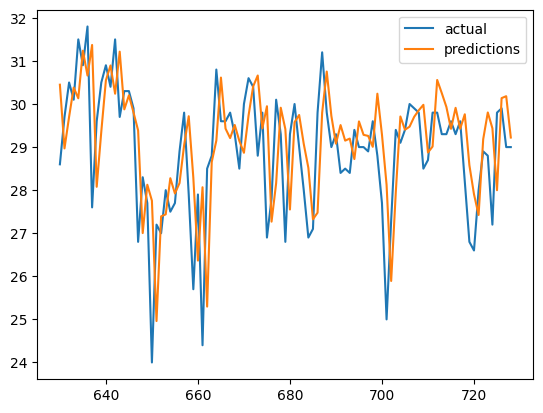

In [ ]:
combined.plot() #Differences between actual and predicted values

In [ ]:
reg.coef_

array([-2.01466684e-03,  7.23722890e-01,  1.41268533e-01, -3.96974555e-02,
       -6.00819052e-05])

In [ ]:
def create_predictions(predictors,core_weather,reg):
  train=core_weather.loc[:629]
  test=core_weather.loc[630:]
  reg.fit(train[predictors],train["target"])
  predictions=reg.predict(test[predictors])
  error=mean_absolute_error(test["target"], predictions)
  combined=pd.concat([test["target"],pd.Series(predictions,index=test.index)], axis=1)
  combined.columns=["actual","predictions"]
  return error, combined

In [ ]:
core_weather["month_max"]=core_weather["tempmax"].rolling(30).mean()
core_weather

,datetime,tempmax,tempmin,humidity,dew,precip,sealevelpressure,target,month_max
0,2020-11-29,26.5,20.0,85.8,19.9,0.0,1014.9,27.6,NaN
1,2020-11-30,27.6,18.3,78.3,18.7,0.0,1014.5,27.6,NaN
2,2020-12-01,27.6,18.0,76.1,17.4,0.0,1014.5,28.6,NaN
3,2020-12-02,28.6,15.5,67.9,15.1,0.0,1013.3,27.4,NaN
4,2020-12-03,27.4,14.6,77.3,17.2,0.0,1012.9,27.2,NaN
...,...,...,...,...,...,...,...,...,...
724,2022-11-23,28.8,21.0,67.8,17.8,0.1,1014.2,27.2,28.783333
725,2022-11-24,27.2,20.5,73.1,18.5,0.0,1014.5,29.8,28.710000
726,2022-11-25,29.8,19.7,63.8,16.4,0.0,1015.2,29.9,28.736667
727,2022-11-26,29.9,17.2,55.6,13.0,0.0,1014.2,29.0,28.766667


In [ ]:
core_weather["month_day_max"]=core_weather["month_max"]/core_weather["tempmax"]

In [ ]:
core_weather["max_min"]=core_weather["tempmax"]/core_weather["tempmin"]

In [ ]:
core_weather=core_weather.iloc[30:,:].copy()

In [ ]:
predictors=["precip","tempmax","tempmin","humidity","sealevelpressure","month_max","month_day_max","max_min"]

In [ ]:
error,combined=create_predictions(predictors,core_weather,reg)

In [ ]:
error

1.0476350977844002

<Axes: >

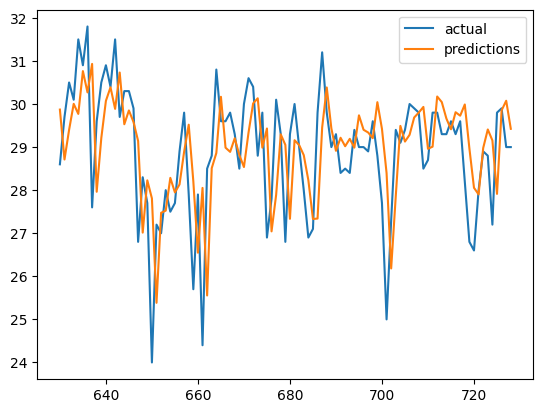

In [ ]:
combined.plot()

In [ ]:
core_weather["monthly_avg"]=core_weather["tempmax"].groupby(core_weather.index).apply(lambda x: x.expanding(1).mean())
core_weather

<ipython-input-46-9fcf0fa9d2a5>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  core_weather["monthly_avg"]=core_weather["tempmax"].groupby(core_weather.index).apply(lambda x: x.expanding(1).mean())


,datetime,tempmax,tempmin,humidity,dew,precip,sealevelpressure,target,month_max,month_day_max,max_min,monthly_avg
30,2020-12-29,27.2,14.5,75.7,16.1,0.0,1012.6,26.1,27.620000,1.015441,1.875862,27.2
31,2020-12-30,26.1,17.0,77.3,16.8,0.0,1013.0,25.5,27.570000,1.056322,1.535294,26.1
32,2020-12-31,25.5,18.0,82.4,17.9,0.0,1013.8,24.8,27.500000,1.078431,1.416667,25.5
33,2021-01-01,24.8,17.9,80.7,17.3,0.0,1014.4,26.8,27.373333,1.103763,1.385475,24.8
34,2021-01-02,26.8,15.0,76.9,16.2,0.0,1014.1,26.3,27.353333,1.020647,1.786667,26.8
...,...,...,...,...,...,...,...,...,...,...,...,...
724,2022-11-23,28.8,21.0,67.8,17.8,0.1,1014.2,27.2,28.783333,0.999421,1.371429,28.8
725,2022-11-24,27.2,20.5,73.1,18.5,0.0,1014.5,29.8,28.710000,1.055515,1.326829,27.2
726,2022-11-25,29.8,19.7,63.8,16.4,0.0,1015.2,29.9,28.736667,0.964318,1.512690,29.8
727,2022-11-26,29.9,17.2,55.6,13.0,0.0,1014.2,29.0,28.766667,0.962096,1.738372,29.9


In [ ]:
reg.coef_

array([-7.44752828e-03,  6.46841861e-01,  1.01372953e-01, -3.08695743e-02,
        3.74705714e-04,  1.72753089e-01,  9.03412259e-01,  6.90941576e-01])

In [ ]:
core_weather.corr()["target"]

<ipython-input-48-e318dddd3887>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  core_weather.corr()["target"]


tempmax             0.900985
tempmin             0.480408
humidity           -0.648080
dew                -0.107550
precip             -0.157402
sealevelpressure    0.003235
target              1.000000
month_max           0.783911
month_day_max      -0.373391
max_min             0.176154
monthly_avg         0.900985
Name: target, dtype: float64

In [ ]:
combined["diff"]=(combined["actual"]-combined["predictions"]).abs()

In [ ]:
combined.sort_values("diff",ascending=False).head()

,actual,predictions,diff
650,24.0,27.808682,3.808682
661,24.4,28.052578,3.652578
701,25.0,28.398196,3.398196
637,27.6,30.930980,3.330980
662,28.5,25.555321,2.944679


In [ ]:
#Using Support vector machine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1= pd.read_csv('/content/ICRISAT Weather 1978 to 2018.csv')
df1

,Station,Date,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET,Lat,Lon,Cum_Rain
0,ICRISAT,1/1/1978,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,18.4,3.9,17.508409,78.2723,0.0
1,ICRISAT,1/2/1978,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,16.9,3.9,17.508409,78.2723,0.0
2,ICRISAT,1/3/1978,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,15.3,3.4,17.508409,78.2723,0.0
3,ICRISAT,1/4/1978,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,16.4,3.8,17.508409,78.2723,0.0
4,ICRISAT,1/5/1978,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,15.9,4.1,17.508409,78.2723,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14848,ICRISAT,27-Aug-2018,29.5,22.2,93,64.0,9.6,4.5,1.4,2.5,12.9,3.5,17.508409,78.2723,1493.2
14849,ICRISAT,28-Aug-2018,29.2,22.6,90,70.0,9.2,13.2,0.4,4.7,11.7,3.2,17.508409,78.2723,1506.4
14850,ICRISAT,29-Aug-2018,29.6,22.4,91,63.0,7.6,14.0,2.9,3.6,15.0,3.7,17.508409,78.2723,1520.4
14851,ICRISAT,30-Aug-2018,30.6,23.0,87,59.0,8.2,0.0,9.8,5.2,19.7,4.7,17.508409,78.2723,1520.4


In [ ]:
core_weather1=df1[["MaxT","MinT","Wind","Rain","RH1","RH2","Radiation"]].copy()
core_weather1.apply(pd.isnull).sum()/df.shape[0]

MaxT         0.00000
MinT         0.00000
Wind         0.00000
Rain         0.00000
RH1          0.00000
RH2          0.00000
Radiation    0.00137
dtype: float64

In [ ]:
core_weather1["Radiation"]=core_weather1["Radiation"].fillna(0)
core_weather1.apply(pd.isnull).sum()/df.shape[0]

MaxT         0.0
MinT         0.0
Wind         0.0
Rain         0.0
RH1          0.0
RH2          0.0
Radiation    0.0
dtype: float64

In [ ]:
core_weather1

,MaxT,MinT,Wind,Rain,RH1,RH2,Radiation
0,28.5,14.2,5.7,0.0,68,31.0,18.4
1,28.8,16.0,6.4,0.0,79,33.0,16.9
2,29.0,14.5,5.4,0.0,86,37.0,15.3
3,29.0,18.0,7.1,0.0,89,43.0,16.4
4,27.8,17.0,10.5,0.0,81,47.0,15.9
...,...,...,...,...,...,...,...
14848,29.5,22.2,9.6,4.5,93,64.0,12.9
14849,29.2,22.6,9.2,13.2,90,70.0,11.7
14850,29.6,22.4,7.6,14.0,91,63.0,15.0
14851,30.6,23.0,8.2,0.0,87,59.0,19.7


In [ ]:
core_weather1['weather_condition'] = 'Unknown'  # Initialize with a default label

# Define conditions for different weather conditions
conditions = [
    (core_weather1['Rain'] > 0) & (core_weather1['Radiation'] < 200),
    (core_weather1['MaxT']>=34),
    (core_weather1['MinT'] <= 23),
    (core_weather1['RH1'] > 80) | (core_weather1['RH2'] > 80),
]
# Define labels corresponding to each condition
labels = ['Rainy', 'Hot', 'Cool', 'humid']

# Assign the corresponding label based on the conditions
for condition, label in zip(conditions, labels):
    core_weather1.loc[condition, 'weather_condition'] = label

# Split the dataset into features (X) and the target variable (y)
X = core_weather1[['MaxT', 'MinT', 'Wind', 'Rain', 'RH1', 'RH2', 'Radiation']]
y = core_weather1['weather_condition']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create an SVM classifier
svm_classifier = SVC()
# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [ ]:
# Accuracy of SVM classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9656681252103669


In [ ]:
from sklearn.metrics import accuracy_score
precision=precision_score(y_test,y_pred,average='weighted')
print("Precision:",precision)

Precision: 0.9535031204625666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
actual_maxt = X_test['MaxT']
predicted_maxt = X_test['MaxT'].copy()
predicted_maxt.loc[:] = y_pred
# Create a DataFrame to store actual and predicted 'MaxT' values
maxt_results1 = pd.DataFrame({'Actual MaxT': actual_maxt, 'Predicted MaxT': predicted_maxt})

# Print the table of actual and predicted 'MaxT' values
print(maxt_results1)

       Actual MaxT Predicted MaxT
3838          33.8          humid
9129          30.2          humid
5902          33.0           Cool
13847         31.2          humid
6860          31.0          humid
...            ...            ...
11662         28.6          humid
4269          28.0          humid
8101          34.2           Cool
971           29.0          humid
14598         28.0          humid

[2971 rows x 2 columns]


In [ ]:
label_encoder = LabelEncoder() #Convert into numerical values
predicted_maxt_encoded = label_encoder.fit_transform(predicted_maxt)
maxt_results2 = pd.DataFrame({'Actual MaxT': actual_maxt, 'Predicted MaxT': predicted_maxt_encoded})
print(maxt_results2)

       Actual MaxT  Predicted MaxT
3838          33.8               2
9129          30.2               2
5902          33.0               0
13847         31.2               2
6860          31.0               2
...            ...             ...
11662         28.6               2
4269          28.0               2
8101          34.2               0
971           29.0               2
14598         28.0               2

[2971 rows x 2 columns]


<ipython-input-63-c14329b09ffe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(core_weather1["MaxT"])


<Axes: xlabel='MaxT', ylabel='Density'>

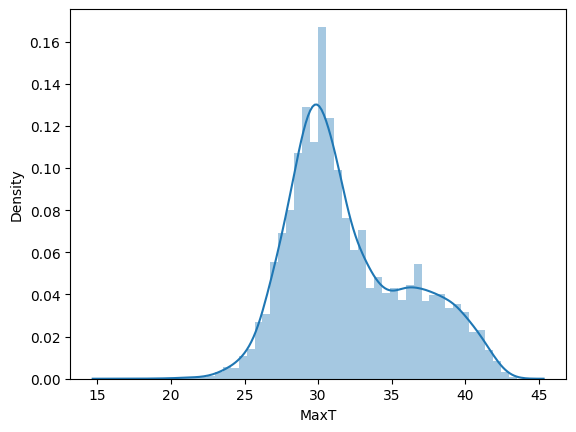

In [ ]:
import seaborn as sns
sns.distplot(core_weather1["MaxT"])

In [ ]:
#Weather prediction using Neural networks
#Using Multilayer Perceptron Classifier (MLP Classifier) :- ANN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score

In [ ]:
core_weather1

,MaxT,MinT,Wind,Rain,RH1,RH2,Radiation,weather_condition
0,28.5,14.2,5.7,0.0,68,31.0,18.4,Cool
1,28.8,16.0,6.4,0.0,79,33.0,16.9,Cool
2,29.0,14.5,5.4,0.0,86,37.0,15.3,humid
3,29.0,18.0,7.1,0.0,89,43.0,16.4,humid
4,27.8,17.0,10.5,0.0,81,47.0,15.9,humid
...,...,...,...,...,...,...,...,...
14848,29.5,22.2,9.6,4.5,93,64.0,12.9,humid
14849,29.2,22.6,9.2,13.2,90,70.0,11.7,humid
14850,29.6,22.4,7.6,14.0,91,63.0,15.0,humid
14851,30.6,23.0,8.2,0.0,87,59.0,19.7,humid


In [ ]:
core_weather1['weather_condition'] = 'Unknown'  # Initialize with a default label

# Define conditions for different weather conditions
conditions = [
    (core_weather1['Rain'] > 0) & (core_weather1['Radiation'] < 200),
    (core_weather1['MaxT']>=34),
    (core_weather1['MinT'] <= 23),
    (core_weather1['RH1'] > 80) | (core_weather1['RH2'] > 80),
]
# Define labels corresponding to each condition
labels = ['Rainy', 'Hot', 'Cool', 'humid']

# Assign the corresponding label based on the conditions
for condition, label in zip(conditions, labels):
    core_weather1.loc[condition, 'weather_condition'] = label

# Split the dataset into features (X) and the target variable (y)
X = core_weather1[['MaxT', 'MinT', 'Wind', 'Rain', 'RH1', 'RH2', 'Radiation']]
y = core_weather1['weather_condition']

In [ ]:
# Convert the target variable to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a neural network classifier with increased max_iter
nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, random_state=42)

In [ ]:
# Train the classifier
nn_classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = nn_classifier.predict(X_test)

In [ ]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9599461460787614


In [ ]:
from sklearn.metrics import accuracy_score
precision=precision_score(y_test,y_pred,average='weighted')
print("Precision:",precision)

Precision: 0.9593796205326801


In [ ]:
#Using Decision Trees

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [ ]:
core_weather1['weather_condition'] = 'Unknown'  # Initialize with a default label

# Define conditions for different weather conditions
conditions = [
    (core_weather1['Rain'] > 0) & (core_weather1['Radiation'] < 200),
    (core_weather1['MaxT']>=34),
    (core_weather1['MinT'] <= 23),
    (core_weather1['RH1'] > 80) | (core_weather1['RH2'] > 80),
]
# Define labels corresponding to each condition
labels = ['Rainy', 'Hot', 'Cool', 'humid']

# Assign the corresponding label based on the conditions
for condition, label in zip(conditions, labels):
    core_weather1.loc[condition, 'weather_condition'] = label

# Split the dataset into features (X) and the target variable (y)
X = core_weather1[['MaxT', 'MinT', 'Wind', 'Rain', 'RH1', 'RH2', 'Radiation']]
y = core_weather1['weather_condition']

In [ ]:
# Convert the target variable to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

In [ ]:
# Train the classifier
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [ ]:
# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted') #Over fitting
print("Precision:", precision)

Precision: 1.0


In [ ]:
actual_maxt = X_test['MaxT']
predicted_maxt = X_test['MaxT'].copy()
predicted_maxt.loc[:] = y_pred
# Create a DataFrame to store actual and predicted 'MaxT' values
maxt_results1 = pd.DataFrame({'Actual MaxT': actual_maxt, 'Predicted MaxT': predicted_maxt})

# Print the table of actual and predicted 'MaxT' values
print(maxt_results1)

       Actual MaxT  Predicted MaxT
3838          33.8             4.0
9129          30.2             4.0
5902          33.0             0.0
13847         31.2             4.0
6860          31.0             4.0
...            ...             ...
11662         28.6             4.0
4269          28.0             4.0
8101          34.2             0.0
971           29.0             4.0
14598         28.0             4.0

[2971 rows x 2 columns]


In [ ]:
#Random forests

In [ ]:
core_weather1

,MaxT,MinT,Wind,Rain,RH1,RH2,Radiation,weather_condition
0,28.5,14.2,5.7,0.0,68,31.0,18.4,Cool
1,28.8,16.0,6.4,0.0,79,33.0,16.9,Cool
2,29.0,14.5,5.4,0.0,86,37.0,15.3,humid
3,29.0,18.0,7.1,0.0,89,43.0,16.4,humid
4,27.8,17.0,10.5,0.0,81,47.0,15.9,humid
...,...,...,...,...,...,...,...,...
14848,29.5,22.2,9.6,4.5,93,64.0,12.9,humid
14849,29.2,22.6,9.2,13.2,90,70.0,11.7,humid
14850,29.6,22.4,7.6,14.0,91,63.0,15.0,humid
14851,30.6,23.0,8.2,0.0,87,59.0,19.7,humid


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
core_weather1['weather_condition'] = 'Unknown'  # Initialize with a default label

# Define conditions for different weather conditions
conditions = [
    (core_weather1['Rain'] > 0) & (core_weather1['Radiation'] < 200),
    (core_weather1['MaxT']>=34),
    (core_weather1['MinT'] <= 23),
    (core_weather1['RH1'] > 80) | (core_weather1['RH2'] > 80),
]
# Define labels corresponding to each condition
labels = ['Rainy', 'Hot', 'Cool', 'humid']

# Assign the corresponding label based on the conditions
for condition, label in zip(conditions, labels):
    core_weather1.loc[condition, 'weather_condition'] = label

# Split the dataset into features (X) and the target variable (y)
X = core_weather1[['MaxT', 'MinT', 'Wind', 'Rain', 'RH1', 'RH2', 'Radiation']]
y = core_weather1['weather_condition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

In [ ]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.998653651969034


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.998648334890422
